In [1]:
import pandas as pd
df_cell_info = pd.read_csv('data/cell_info.txt', sep='\t')     # Metadata for cell lines (the samples of the data matrices)
df_gene_info = pd.read_csv('data/gene_info.txt', sep='\t')     # Metadata for genes (the features of the data matrices)
df_inst_info = pd.read_csv('data/inst_info.txt', sep='\t')     # Metadata for L1000 experiments (the data matrices)
df_pert_info = pd.read_csv('data/pert_info.txt', sep='\t')     # Metadata for perturbations applied in L1000 experiments
df_sig_info = pd.read_csv('data/sig_info.txt', sep='\t')       # Metadata for level 5 profiles

In [2]:
# print columns of all dataframes
print("Cell info columns:", df_cell_info.columns.tolist())
print("Gene info columns:", df_gene_info.columns.tolist())
print("Instance info columns:", df_inst_info.columns.tolist())
print("Perturbation info columns:", df_pert_info.columns.tolist())
print("Signature info columns:", df_sig_info.columns.tolist())

Cell info columns: ['cell_id', 'cell_type', 'base_cell_id', 'precursor_cell_id', 'modification', 'sample_type', 'primary_site', 'subtype', 'original_growth_pattern', 'provider_catalog_id', 'original_source_vendor', 'donor_age', 'donor_sex', 'donor_ethnicity']
Gene info columns: ['pr_gene_id', 'pr_gene_symbol', 'pr_gene_title', 'pr_is_lm', 'pr_is_bing']
Instance info columns: ['inst_id', 'cell_id', 'det_plate', 'det_well', 'pert_mfc_id', 'pert_dose', 'pert_dose_unit', 'pert_id', 'pert_iname', 'pert_type', 'pert_time', 'pert_time_unit']
Perturbation info columns: ['pert_id', 'canonical_smiles', 'inchi_key', 'pert_iname', 'pert_type']
Signature info columns: ['sig_id', 'pert_id', 'pert_iname', 'pert_type', 'cell_id', 'pert_idose', 'pert_itime', 'distil_id']


Number of instances before filtering: 345976
Number of instances after filtering: 325843


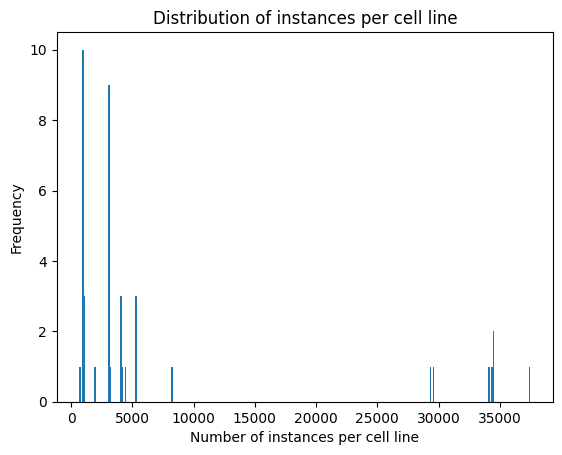

In [10]:
# for df_inst_info, group by "cell_id" and count number of instances per cell line
# filter out rows where pret_type has ctl in it. print rowcount before and after filtering
print("Number of instances before filtering:", df_inst_info.shape[0])
df_inst_info = df_inst_info[~df_inst_info['pert_type'].str.contains('ctl', na=False)]
print("Number of instances after filtering:", df_inst_info.shape[0])
instance_counts = df_inst_info.groupby('cell_id').size()
# plot histogram of instance counts
import matplotlib.pyplot as plt
plt.hist(instance_counts, bins=300)
plt.xlabel('Number of instances per cell line')
plt.ylabel('Frequency')
plt.title('Distribution of instances per cell line')
plt.show()

In [ ]:
# I now want to further analyze df_inst_info. I want to know per cell line, how many unique genes were perturbed.

# we choose cellline a549


In [12]:
df_inst_info =df_inst_info[df_inst_info['cell_id'] == 'A549']
#count values pert_type
df_inst_info['pert_type'].value_counts()

pert_type
trt_cp         8176
ctl_vehicle     564
Name: count, dtype: int64

In [5]:
df_sig_info

,sig_id,pert_id,pert_iname,pert_type,cell_id,pert_idose,pert_itime,distil_id
0,LJP005_A375_24H:A03,DMSO,DMSO,ctl_vehicle,A375,-666,24 h,LJP005_A375_24H_X1_B19:A03|LJP005_A375_24H_X2_...
1,LJP005_A375_24H:A04,DMSO,DMSO,ctl_vehicle,A375,-666,24 h,LJP005_A375_24H_X1_B19:A04|LJP005_A375_24H_X2_...
2,LJP005_A375_24H:A05,DMSO,DMSO,ctl_vehicle,A375,-666,24 h,LJP005_A375_24H_X1_B19:A05|LJP005_A375_24H_X2_...
3,LJP005_A375_24H:A06,DMSO,DMSO,ctl_vehicle,A375,-666,24 h,LJP005_A375_24H_X1_B19:A06|LJP005_A375_24H_X2_...
4,LJP005_A375_24H:A07,BRD-K76908866,CP-724714,trt_cp,A375,10.0 um,24 h,LJP005_A375_24H_X1_B19:A07|LJP005_A375_24H_X2_...
...,...,...,...,...,...,...,...,...
118045,XPR002_YAPC.311_96H:G22,BRDN0001054782,SMAD4,trt_xpr,YAPC.311,-666,96 h,XPR002_YAPC.311_96H_X2_B22:G22|XPR002_YAPC.311...
118046,XPR002_YAPC.311_96H:G23,BRDN0001055014,EGFR,trt_xpr,YAPC.311,-666,96 h,XPR002_YAPC.311_96H_X2_B22:G23|XPR002_YAPC.311...
118047,XPR002_YAPC.311_96H:J16,BRDN0000585515,LUCIFERASE,ctl_vector,YAPC.311,-666,96 h,XPR002_YAPC.311_96H_X2_B22:J16|XPR002_YAPC.311...
118048,XPR002_YAPC.311_96H:M15,BRDN0001054777,EXO1,trt_xpr,YAPC.311,-666,96 h,XPR002_YAPC.311_96H_X2_B22:M15|XPR002_YAPC.311...
